In [1]:
import pandas as pd
import numpy as np              #For mathematical calculation 
import seaborn as sns           # For data visualization
import matplotlib.pyplot as plt #For plotting graph
%matplotlib inline
import warnings                 # To ignore any warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In this section, we wil look at the structure of the train and test dataset. Firstly, we will check the features present in our data and then we will look at their data types.

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variable and 1 target variable i.e. Loan_status in the train dataset. Lets also have a look at the columns of test dataset.

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

We have similar feature in the test dataset as the train dataset except the Loan_status. We will predict the Loan_status using the model I build using train data. 

In [6]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Lets Look at the shape of the dataset.
train.shape,test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 row and 12 columns in the test dataset

# Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical feature we can use frequency table or bar plot which will calculate the number of each category in a particular variable. For numerical feature, probability density plot can be used to look at the distribution of the variable.

# Target Variable 

We will firstly look at the target variable. i.e. Loan_Status.As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [8]:
# Frequency table of a variable will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

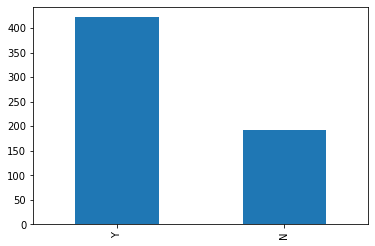

In [10]:
train['Loan_Status'].value_counts().plot.bar()
plt.show()

The loan of 462 (around 69%) people out of 614 was approved.

Now lets visualize each variable separately have categories ordinal and numerical
- Categorical feature: These feature have categories(Gender,Married,Self_Employeed, Credit_History,Loan_Status)
- Ordinal feature: Variable in categorical feature havin some order involved(Dependents, Education, Property_Area)
- Numerical feature: These feature have numerical values(ApplicantIncome, CoapplicantIncome,LoanAmount,Loan_Amount_Term)



Lets visualize the categorical and ordinal feature first.

#### Independent Variable(Categorical)

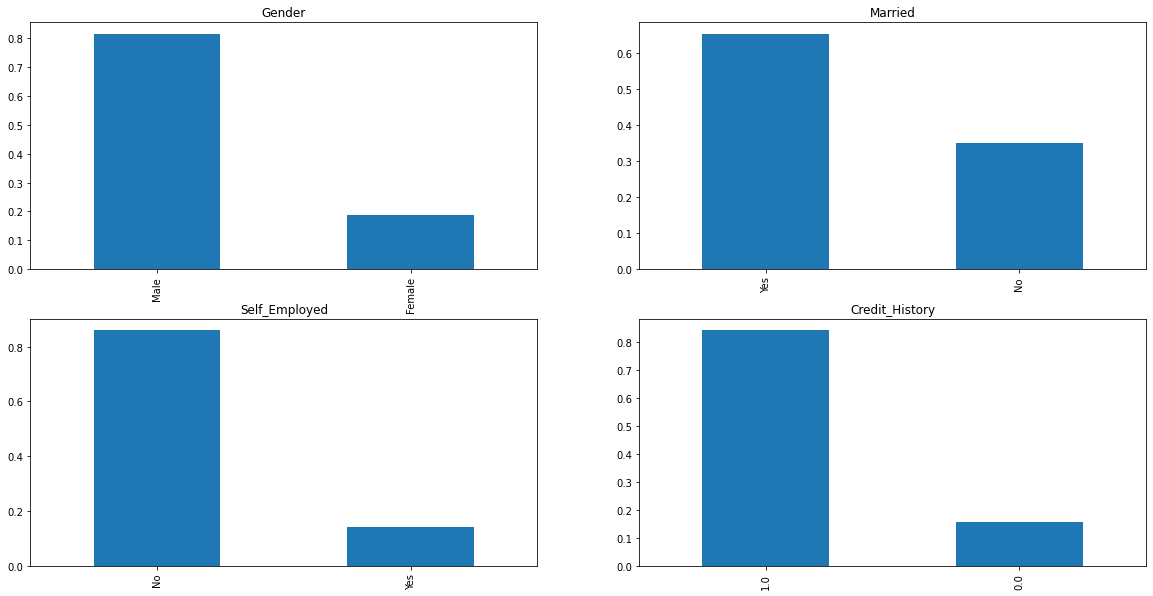

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize = True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize = True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize = True).plot.bar(title='Credit_History')
plt.show()

It can be assumed from the above bar plot that:
- 80% applicant in the dataset are male.
- Around 65% of the applicant in the dataset are married.
- Around 15% applicant in the dataset are Self employed.
- Around 85% applicant have repaid their debts.
Now lets visualize the ordinal variable.

### Independent Variable (ordinal)

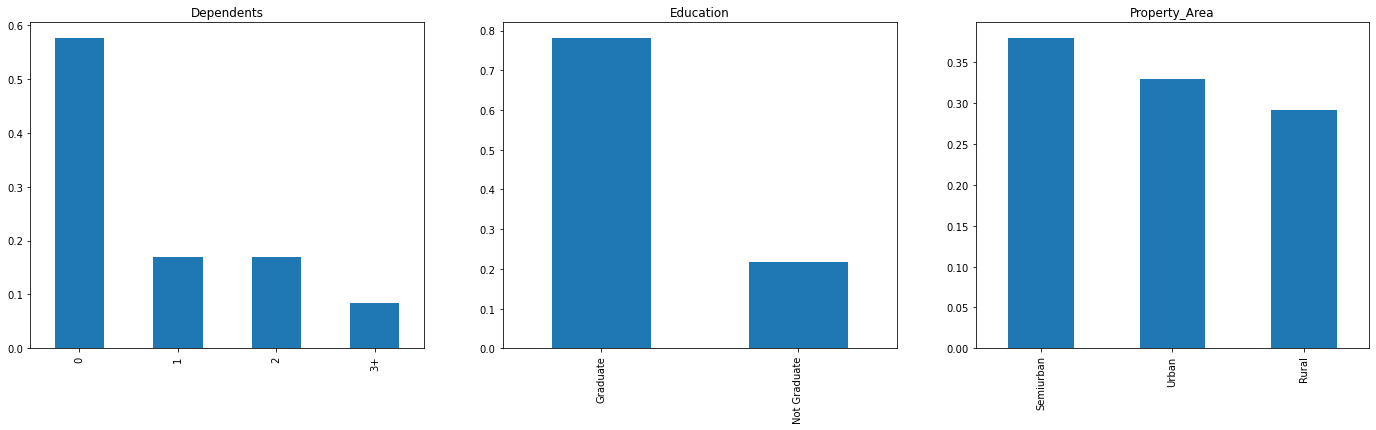

In [12]:
plt.figure(2)
plt.subplot(131)
train['Dependents'].value_counts('normalize = True').plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts('normalize = True').plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts('normalize=True').plot.bar(title='Property_Area')
plt.show()

Followin inference can be made from the above bar plot:
- Most of the applicant don't have any Dependents
- Around 80% of applicant are Graduate.
- Most of thr applicant are from semiurban

#### Independent Variable(Numerical)

Till now we have seen categorical and ordinal variable now lets visualized the numerical variables. Lets look at the distribution of Applicant income first.

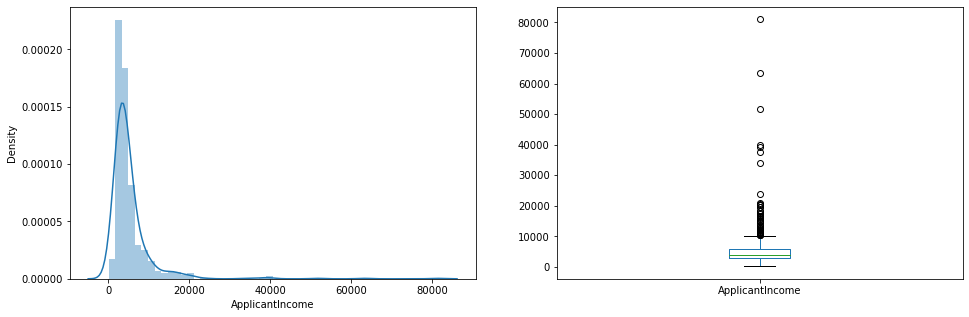

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is toward left which means it is not normally distributed. We will try to make it normal in later section as algorithms works better if the data is normally distributed.

The boxplt confirms the presence of a lot of outlier/extream values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with differnt education level. Let us segregate them by Education:

Text(0.5, 0.98, '')

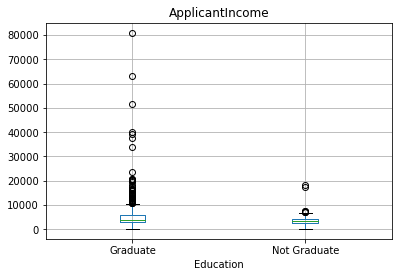

In [14]:
train.boxplot(column = 'ApplicantIncome',by = 'Education')
plt.suptitle("")

We can see that there are higher number of graduated with ver high income, which are appearing to be the outliers.

Lets Look at the Coapplicant income distribution.

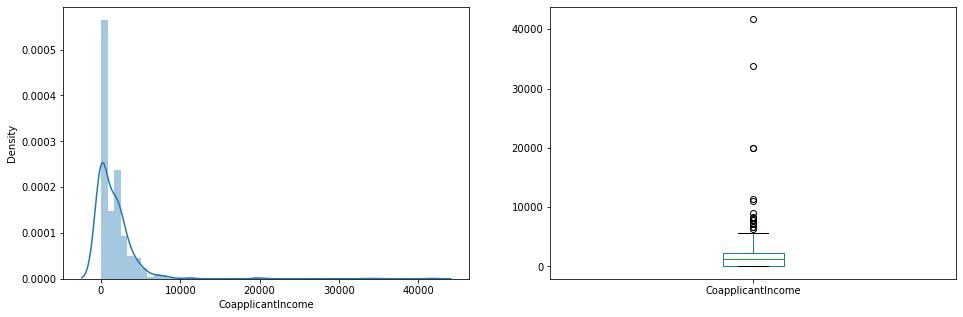

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We see similar distribution as that of the applicant income. Majority of coapplicant's income from 0 to 5000. We also see lots of outliers in the coapplicant income and it is not normally distributed

Lets look at the distribution of LoanAmount variable.

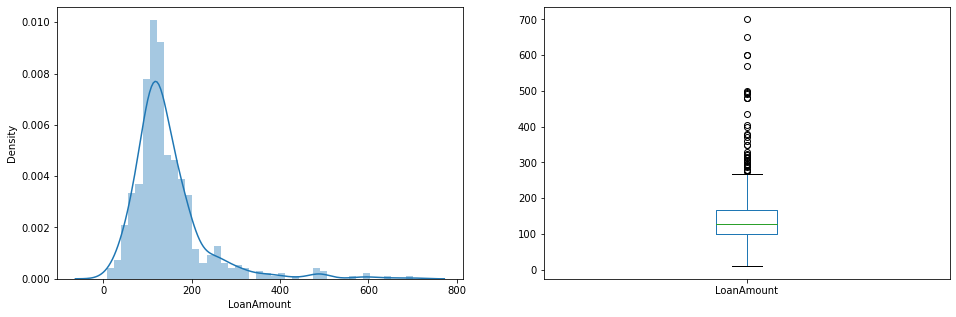

In [16]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and distribution is fairly normal. We will treat the outliers in later sections

Now we would like to know how well each feature correlete with Loan Status. So in the next section we will look at bivariate analysis

# Bivariate Analysis

Lets recall some of the hypothesis that we generated earlier:
- Applicants with high income should have more chance of loan approval.
- Applicants who have repaid their previous debr should have higher chance of loan approval.
- Loan approval should also depend on the loan amount. If the loan amound is less, chance of loan approval should be high.
-  Lesser the amount to be paid monthly to repay the loan,higher the chance of loan approval.


Lets try to test the above mentioned hypotheses using bivariate analysis

After lookingevery variable individually in univariate analysis, we will now exlore them again with respect to the target variable.

### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variable. Lets us look at the stacked bar plot now which will give us the propertion of approved and unapproved loans.

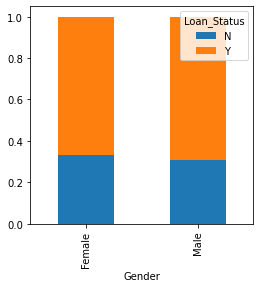

In [17]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now let us visualize the remaining categorical variable vs target variable.

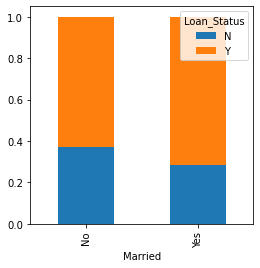

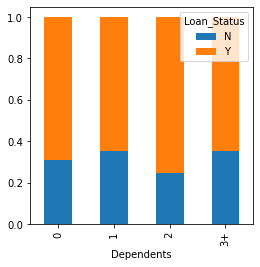

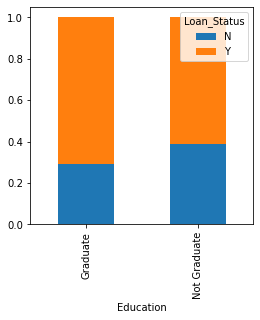

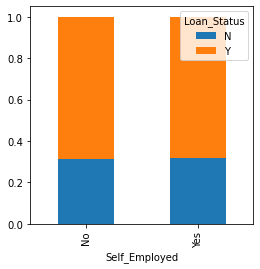

In [18]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

- Proportion of married applicants is higher for the approved loans
- Distribution of application with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Emoloyed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variable and Loan_Status.

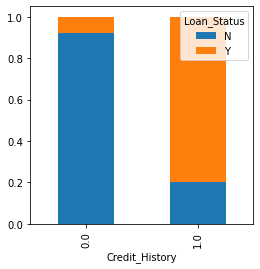

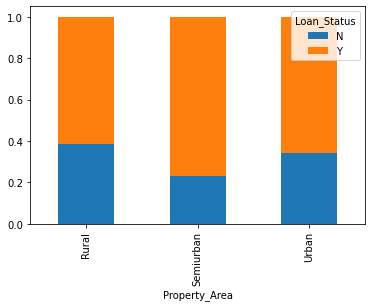

In [19]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

- It seems people with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now lets visualize numerical independent variable with respect to target variable.

### Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved

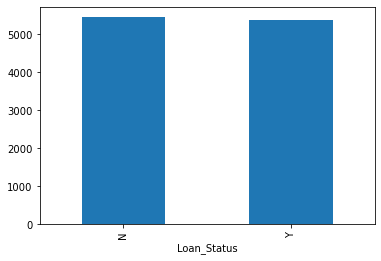

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

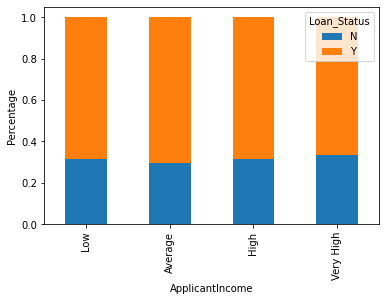

In [21]:
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
p = plt.ylabel('Percentage')

It can be inferred that Applicant Income does not affect the chance of loan approval are high. But this does not look righ. The possible reason behind this may be that most of the applicant dont have any coapplicant so the coapplicant income for such applicants is 0 and hance the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant and coapplicant's income to visualize the combined effect of income on loan approval.

Lets us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [22]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

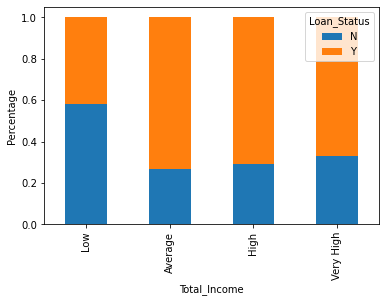

In [23]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
p=plt.ylabel('Percentage')

We can see that Proportion of loan getting approved for applicant having low Total_Income is very less as compared to that of applicants with Avergae, High and Very High Income.

Lets visualize the Loan amount variable.

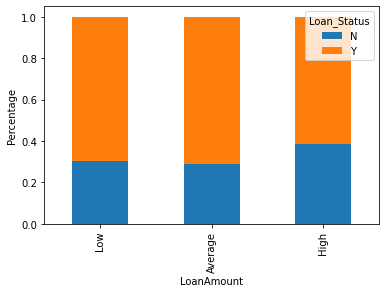

In [24]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
p=plt.ylabel('Percentage')

It can be seen that the proportion of approved loan is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approvel will be high when the loan amount is less.

Lets drop the bins which we created for the exploration part. We will change the 3+ in dependent variable into 0 and 1 so that we can find its correlation with numberical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and y with 1.

In [25]:
train=train.drop(['Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

In [26]:
train['Dependents'].replace('+3',3,inplace=True)
test['Dependents'].replace('+3',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

Now Lets look at the correlation between all the numerical variable. We will use the heat map to visualize the correlation. Heatmap visualize data through variations in coloring. The variables with darker color means their correlation is more.

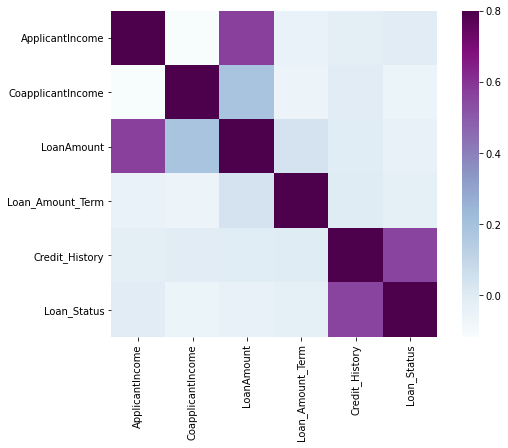

In [27]:
matrix=train.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu')
plt.show()

We see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status).LoanAmount is also correlated with CoapplicantIncome.

## Missing Value and Outlier Treatment

After exploring all thr variable in our data, we can now impute the missing values and treat the outliers becouse missing data and outliers can have adverse effect on the model performance.

#### Missing Value imputation

Lets list out feature-wise count of missing values.

In [28]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History features

We will treat the missing values in all the feature one by one.

We can consider these method to fill the missing values:
- For Numerical Variables: imputation using mean or median
- For categorical Variable: imputation using mode 

There are very Less missing values in Gender,Married,Dependents,Credit_History and Self_Employed Feature so we can fill them using the mode of the features.

In [29]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)


Now lets try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan Amount Term variable.

In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using mode of this variable.

In [31]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

Now we will see the LoanAmount Variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outlier so the mean will not be the prope apporch as it is highly affected by the presence of outliers.

In [32]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [33]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the train dataset. Lets fill the missing values in the test dataset with the same approach.

In [34]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

#### Outlier Treatment

As we sae earlier in univariant analysis. LoanAmount contains outlier so we have to treat them as the presence of outlier affact the distribution of the data. Lets examine what can happen to a data set with outlier. for the sample data set.

1,1,2,2,2,2,3,3,3,4,4
We find the following : mean, median,mode and standard deviation 
Mean = 2.58
Median = 2.5
mode = 2
standard Deviation = 1.08

If we add an outlier to the data set:
1,1,2,2,2,2,3,3,3,4,4,400

The new values of our statistics are:
Mean=35.38
Median=2.5
Mode=2
Standard Deviation=114.74

It can be seen that having outlier ofter has a significant effect on the mean and standard deviation and hance affacting the distribution. We must take steps to remove outlier from our data sets.

Due to these outlier bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affact the smaller values much, but reduce the larger values so we get a distribution similar to normal distribution.

Lets visualize the effect of log transformation.
Will do the similar changes to the test file simultaneously.

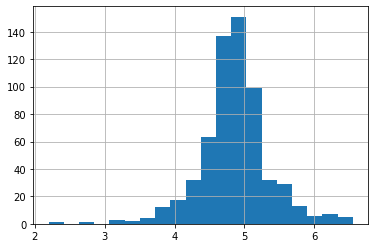

In [35]:
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme value has been significantly suisides. Lets build a logistic regression model and make predication for the test dataset.

## Model Building: Part I

Lets us make our first model to predict the target variable. We will start with Logitstic Regression which is used for prediction binary outcume.

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [36]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

We will use scikit-learn(sklearn) for making different model which is an open source library for python. It is one of the most effecient tool which contain many inbuilt funtion that can be used for modeling in Python.

Sklearn required the target variable in a separate dataset. So we will drop our target variable from the train dataset and save it in another dataset.

In [37]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variable for the categorical variable, Dummy variable turn categorical variables into a series of 0 and 1 making them lot easer to quantiy and compare. 
Lets us understand the process of dummies first:
- Consider the "Gender" variable. It has two classes, Male and Female.
- As logistic regression takes only he numerical values as input, we have to changes male and female into numerical value.
- Once we apply dummies to this variable, it will convert the "Gender" variable into two variable (Gender_Male and Gender_Female), one for each class, i.e. Male and Female 
- Gender_Male will have a value of 0 if the gender is female and a values of 1 if the gender is Male.

In [38]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Now we will train the model on traing dataset and make predictions for the test dataset. But can we validate thee predictions? One ways of doing this we can divide our train dataset into two parts: train and validation. we can train the model on this train part and using that make predication for the validation part, In this way we can validate our prediction as we have the true prediction for the validation part.

We will use the train_tets_split function from sklearn to divide our train dataset. so first let us import train_test_split.

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

The dataset has been divided into training and validation part. Lets us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Lets predict the Loan_Status for validation set and calculate its accuracy

In [42]:
pred_cv=model.predict(x_cv)

Let calculate how accurate our prediction are by calculating the accuracy.

In [43]:
accuracy_score(y_cv,pred_cv)

0.7567567567567568

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

Lets make prediction for the test dataset.

In [44]:
pred_test=model.predict(test)

Lets import the submission file which we have to submit on the solution checker.

In [45]:
submission=pd.read_csv('sample_submission.csv')

We only need the Loan_ID and the corresponding Loan_Status for the final submission. We will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e. pred_test respectively.

In [46]:
submission['Loan_Status']=pred_test

In [47]:
submission['Loan_ID']=test_original['Loan_ID']

Remember we need predictions in Y and N. So lets convert  1 and 0 to Y and N.

In [48]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

Finally we will convert the submission to .csv format and make submission to check the accuracy oon the leaderboard.

In [49]:
pd.DataFrame(submission,columns = ['Loan_ID','Loan_Status']).to_csv('logistic.csv')

From this submission we got an accuracy of 0.8 on the leaderboard

Instead of creating validation set, we can aslo make use ofcross validation to validate our prediction. We will learn about this technique in next section.

## Logistic Regression using stratified k-folds cross validation

To check how robust our model is to unseen data, we can use Validation. It is a technique which involves reserving a particular sample of  dataset on which you do not train the model. Later, you test your model on this sample before finilizing it. Some of the common methods for validation are listed below:

- The validation set apporch
- K-fold cross validation
- Leave one out cross validation (LOOCV)
- Stratified K-fold cross validation

In [50]:
from sklearn.model_selection import StratifiedKFold

Now let's make a cross validation logistic model with stractified 5 fold and make predictions for test dataset

In [51]:
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.iloc[train_index],X.iloc[test_index] 
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7950819672131147


The mean validation accuracy for this model turn out to be 0.78. Let us visualize the roccurve.

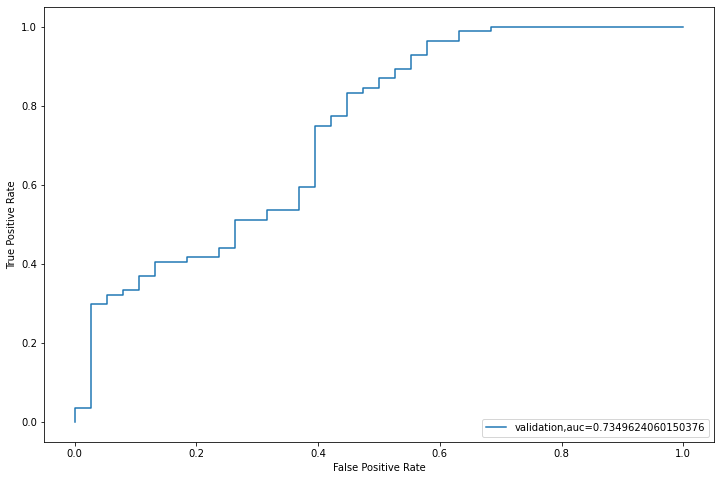

In [52]:
from sklearn import metrics 
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We got an auc value of 0.73

In [53]:
submission['Loan_Status']=pred_test

In [54]:
submission['Loan_ID']=test_original['Loan_ID']

Remember we need predictions in Y and N. So lets convert 1 and 0 to Y and N

In [55]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

Lets convert the submission to .csv format and make submission to check he 

In [56]:
pd.DataFrame(submission,columns=['Load_ID','Load_Status']).to_csv('Logistic.csv')

From this submission we got an accuracy of 0.78472 on the leaderboar. Now we will try to improve this accuracy using different approaches.

## Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create following three new features: 

- Total Income
- EMI
- Balance Income

In [57]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

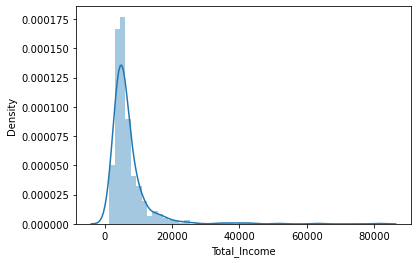

In [58]:
# Check the distribution of TotalIncome.
sns.distplot(train['Total_Income']);

We can see it is shifted towards left i.e. the distribution is right skewed So lets take the log transformation to make the distribution normal.

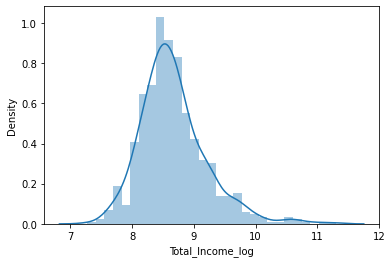

In [59]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log']=np.log(test['Total_Income'])

Now the distribution look much closer to normal and effect of extreme values has been significantly subsided. Lets create the EMI feature now

In [60]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

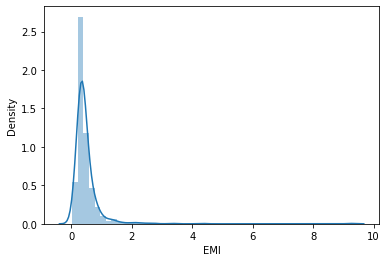

In [61]:
# check the distribution of EMI variable
sns.distplot(train['EMI']);

Lets us create Balance Income feature now and check its distribution

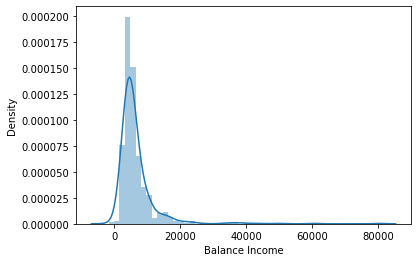

In [62]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) #Multiply with 1000 ti make the unit equal
sns.distplot(train['Balance Income']);

Lets us now drop th variable which we used to create these new feature. Reason for doing this is the correlation between those old feature and these new features. Will be very high and logistic regression assume that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated feature will help in reducing the noise too.

In [63]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

## Model Building: Part II

After creating new feature we can continie the model building process. So we will start with logistic regression model and then move over to more complex model like RandomForest.

We will built the following model in this section:
- Logistic Regression
- Decision Tree
- Random Forest

Lets prepare the data for feeding into the models.

In [64]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status # To save target variable in separate dataset

In [65]:
#X = X.drop('Balance Income',1) #To make column in Equal between X dataset and test dataset
test['Balance Income'] = X['Balance Income'].copy()

#### Logistic Regression

In [66]:
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index] 
    ytr,yvl=y[train_index],y[test_index]
    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


The mean validation accuracy for this model is 0.732

In [67]:
submission['Loan_Status']=pred_test #filling Loan_Status prediction 

In [68]:
submission['Loan_ID']=test_original['Loan_ID'] #filling Loan_ID with test Loan_ID

In [69]:
#replaceing 0 and 1 with N and Y
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [70]:
# Converting submission file to .csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')

From this submission we got an accuracy of 0.7847 on the leaderboard. So we can infer feature engineering has not improve the model. Let us look at some other algorithms

### Decision Tree

In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter/differentiator in input variables.

In [71]:
from sklearn import tree

Lets fit the decision tree model with 5 fold of cross validation.

In [72]:
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index] 
    ytr,yvl=y[train_index],y[test_index]
    
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.7317073170731707

2 of kfold 5
accuracy_score 0.7154471544715447

3 of kfold 5
accuracy_score 0.7479674796747967

4 of kfold 5
accuracy_score 0.7317073170731707

5 of kfold 5
accuracy_score 0.6475409836065574


The mean validation accuracy for this model is 0.7012

In [73]:
submission['Loan_Status']=pred_test #filling Loan_Status with prediction

In [74]:
submission['Loan_ID']=test_original['Loan_ID'] #filling Loan_ID with test Loan_ID

In [75]:
#replaceing 0 and 1 with N and Y
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [76]:
# Converting submission file to .csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Decision_Tree.csv')

We got an accuracy of 0.63 which is much lesser than the accuracy from logistic regression model. Lets build another model i.e. Random Forest

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index] 
    ytr,yvl=y[train_index],y[test_index]
    
    model=RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.7967479674796748

3 of kfold 5
accuracy_score 0.7886178861788617

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7622950819672131


The mean validation accuracy for this model is 0.766

Lets imporve this accuracy by tuning the hyperprameter for this model. We will use grid search tp get the optimized od hyper parameter. Grid-search is a way to select the best of family of hyper Parameter

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
#Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 100 with an interval of 20 for n_estimators
paramgrid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [81]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=1)

In [92]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

KeyboardInterrupt: 

In [85]:
# Estimating the optimized value
grid_search.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

So , the optimized value for the max_depth variable is 3 and for n_estimator is 41. now lets build the model using thes optimized values.

In [86]:
i=1 
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index] 
    ytr,yvl=y[train_index],y[test_index]
    
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred2=model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8211382113821138

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7540983606557377


In [87]:
submission['Loan_Status']=pred_test #filling Loan_Status with prediction

In [88]:
submission['Loan_ID']=test_original['Loan_ID'] #filling Loan_ID with test Loan_ID

In [89]:
#replaceing 0 and 1 with N and Y
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [90]:
# Converting submission file to .csv format
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Random_Forest.csv')

We got an accuracy of 0.7638 from the random forest model on leaderboard

Let us find the feature importance now. i.e. which feature are most important for this problem. We will use feature_importance_attribute of sklearn to do so.

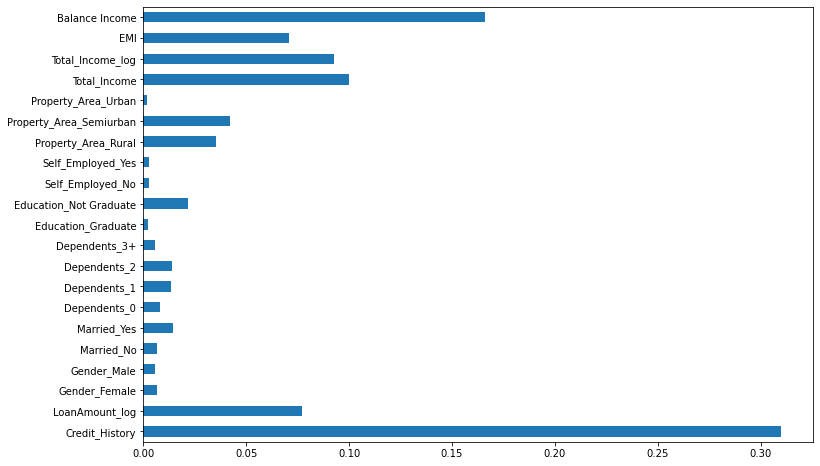

In [91]:
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8));

We can see that Credit_History is the most important feature followed by Balamce Income. Total income,EMI, so feature engineering help us in predicting our target variable.